# Презентация для этого проекта: 

https://docs.google.com/presentation/d/1Wk_UllU8NbShCNir3elaWamP6TUpRWfWDzY_knBdhcA/edit?usp=sharing

# Исследование рынка заведений общественного питания Москвы

Цель данного проекта - открыть небольшое кафе в Москве; оно оригинальное — гостей должны обслуживать роботы
Актуальный вопрос - сможем ли мы снискать популярность на долгое время, когда все зеваки насмотрятся на роботов-официантов?

# Задача

- проанализировать рынок заведений общественного питания Москвы, используя открытые источники;
- сформулировать рекомендации для бизнеса: какие виды заведений пользуются большей популярностью, как распределено количество посадочных мест, какие районы наиболее популярны в плане количества объектов общественного питания


# План

- Исследуйте соотношение видов объектов общественного питания по количеству. Постройте график.
- Исследуйте соотношение сетевых и несетевых заведений по количеству. Постройте график.
- Для какого вида объекта общественного питания характерно сетевое распространение?
- Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?
- Для каждого вида объекта общественного питания опишите среднее количество посадочных мест. Какой вид предоставляет в среднем самое большое количество посадочных мест? Постройте графики.
- Выделите в отдельный столбец информацию об улице из столбца address .
- Постройте график топ-10 улиц по количеству объектов общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?
- Найдите число улиц с одним объектом общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?

# Выгружаем данные

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import plotly.express as px
from io import BytesIO
import requests

In [2]:
rest_data = pd.read_csv(r'C:\Users\polin\Downloads\rest_data.csv')
display(rest_data, rest_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50
...,...,...,...,...,...,...
15361,208537,Шоколадница,да,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50
15362,209264,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",10
15363,209186,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",20
15364,221900,Шоколадница,да,кафе,"город Москва, поселение Московский, Киевское ш...",36


None

Из одинакового числа объектов в каждом столбце мы видим, что пропусков в них нет. Поищем дубликаты:

In [3]:
display(rest_data.duplicated().sum())

0

In [4]:
rest_data[rest_data.duplicated(subset=['object_name', 'chain', 'object_type', 'address', 'number'], keep='first')].count()

id             82
object_name    82
chain          82
object_type    82
address        82
number         82
dtype: int64

# Анализ

Посмотрим на соотношение заведений различных видов:

In [5]:
types = rest_data.groupby(
    by='object_type')\
    .agg({'id':'count'})\
    .reset_index()\
    .sort_values(by='id', ascending=False)
types

,object_type,id
3,кафе,6099
8,столовая,2587
7,ресторан,2285
6,предприятие быстрого обслуживания,1923
0,бар,856
1,буфет,585
4,кафетерий,398
2,закусочная,360
5,магазин (отдел кулинарии),273


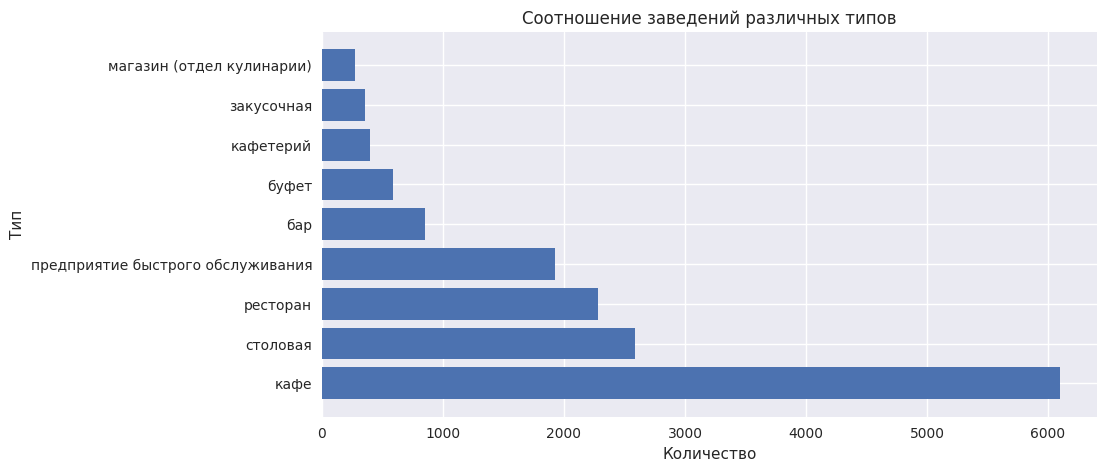

In [6]:
figure(figsize=(10,5))
with plt.style.context('seaborn'):
    plt.barh(types['object_type'], types['id'])
    
plt.title('Соотношение заведений различных типов')
plt.xlabel('Количество')
plt.ylabel('Тип')
plt.show();

# Вывод

Мы видим, что доминирующую позицию на рынке объектов общественного питания занимают кафе - 6099 заведений из 15366 (39,7%)

# Сетевые заведения

Посмотрим на соотношение сетевых заведений к независимым:

In [7]:
chain_or_not = rest_data.pivot_table(index='chain', values='id', aggfunc='count')
chain_or_not

,id
chain,
да,2968
нет,12398


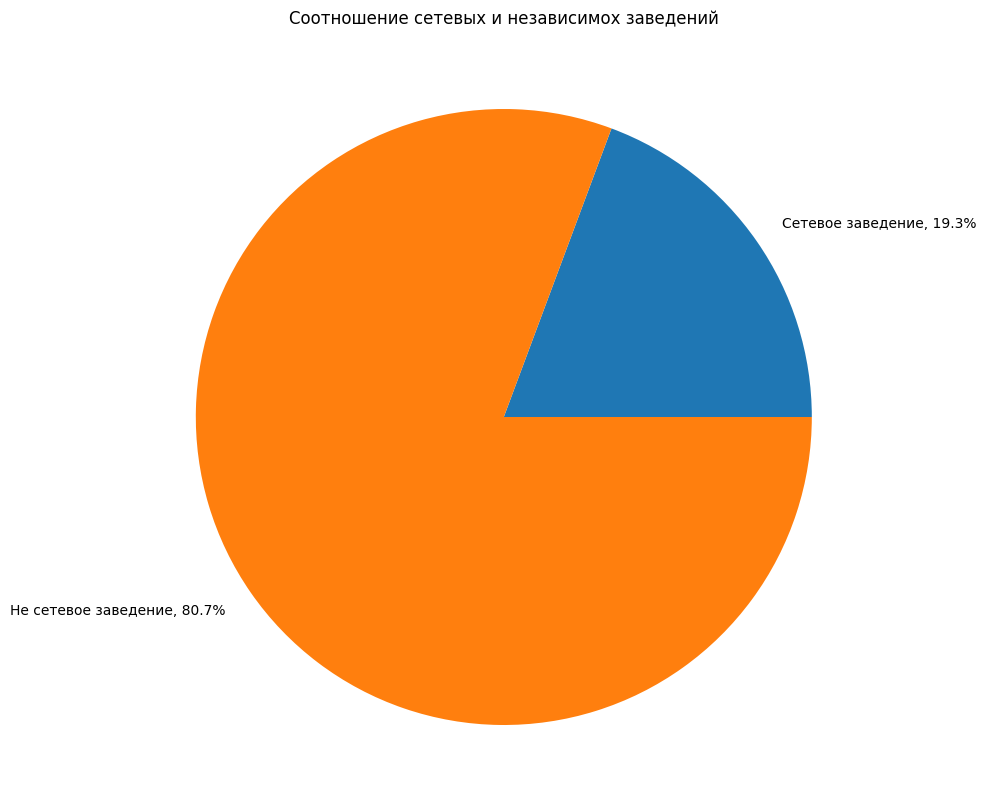

In [8]:
figure(figsize=(10,10))
plt.pie(labels=['Сетевое заведение, 19.3%','Не сетевое заведение, 80.7%'], x='id', data=chain_or_not)
plt.title('Соотношение сетевых и независимох заведений')
plt.show();

In [9]:
display('Процетное соотношение сетевых заведений к не сетевым:', 2968/15366*100)

'Процетное соотношение сетевых заведений к не сетевым:'

19.315371599635558

Из имеющихся у нас данных мы видим, что из 15366 заведений 2968 являются сетевыми, а остальные 12398 - не сетевыми, то есть, сетевые заведения составляют 19,3% от общего числа заведений общепита

Более детально рассмотрим сетевые заведения - посмотрим на лидирующие бренды, типы заведений, количество посадочных мест:

In [10]:
chain = rest_data.query('chain == "да"')
chain

,id,object_name,chain,object_type,address,number
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
6,148815,Брусника,да,кафе,"город Москва, переулок Сивцев Вражек, дом 6/2",10
13,22579,Алло Пицца,да,кафе,"город Москва, улица Авиаторов, дом 14",32
16,144107,Суши Wok,да,предприятие быстрого обслуживания,"город Москва, Азовская улица, дом 3",7
18,58565,Тануки,да,ресторан,"город Москва, Большая Академическая улица, дом 65",160
...,...,...,...,...,...,...
15361,208537,Шоколадница,да,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50
15362,209264,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",10
15363,209186,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",20
15364,221900,Шоколадница,да,кафе,"город Москва, поселение Московский, Киевское ш...",36


In [11]:
chain.pivot_table(index='object_name', values='id', aggfunc='count').sort_values(by='id', ascending=False).head(10)

,id
object_name,
KFC,155
Шоколадница,141
Макдоналдс,122
Бургер Кинг,122
Домино'с Пицца,86
Теремок,84
Крошка Картошка,82
Милти,65
Суши Wok,61


Топ-5 самых популярных сетей - KFC, Шоколадница, Макдоналдс, Бургер Кинг и Домино'с Пицца

In [12]:
gen_types = rest_data.groupby(
    by=['object_type', 'chain'])\
    .agg({'id':'count'})\
    .reset_index()\
    .sort_values(by='id', ascending=False)

gen_types

,object_type,chain,id
7,кафе,нет,4703
17,столовая,нет,2584
15,ресторан,нет,1741
6,кафе,да,1396
13,предприятие быстрого обслуживания,нет,1132
1,бар,нет,819
12,предприятие быстрого обслуживания,да,791
3,буфет,нет,574
14,ресторан,да,544
9,кафетерий,нет,346


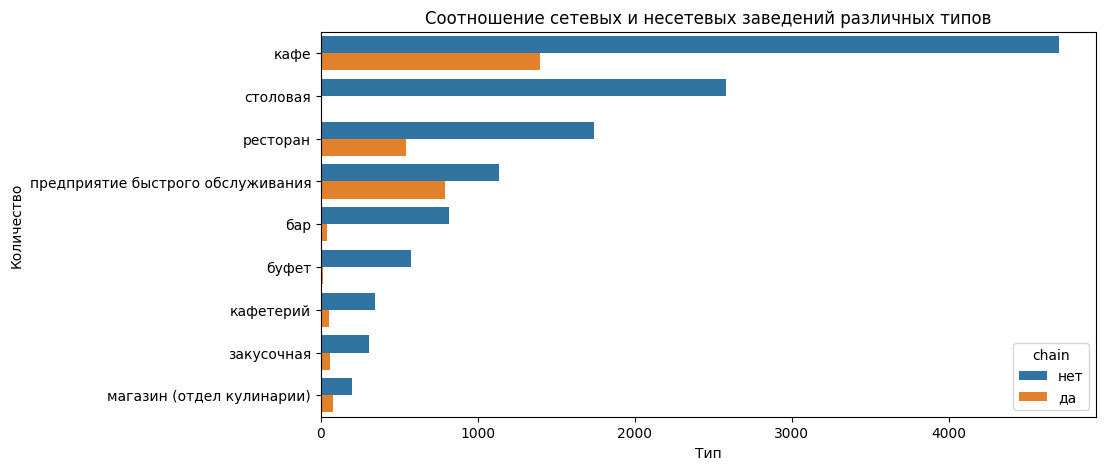

In [13]:
figure(figsize=(10,5))
sns.barplot(x='id', y='object_type', hue='chain', data=gen_types)
plt.title('Соотношение сетевых и несетевых заведений различных типов')
plt.xlabel('Тип')
plt.ylabel('Количество')
plt.show();

In [14]:
chain_df = chain.pivot_table(index='object_type', values='id', aggfunc='count')
chain_df.sort_values(by='id', ascending=False)

,id
object_type,
кафе,1396
предприятие быстрого обслуживания,791
ресторан,544
магазин (отдел кулинарии),78
закусочная,56
кафетерий,52
бар,37
буфет,11
столовая,3


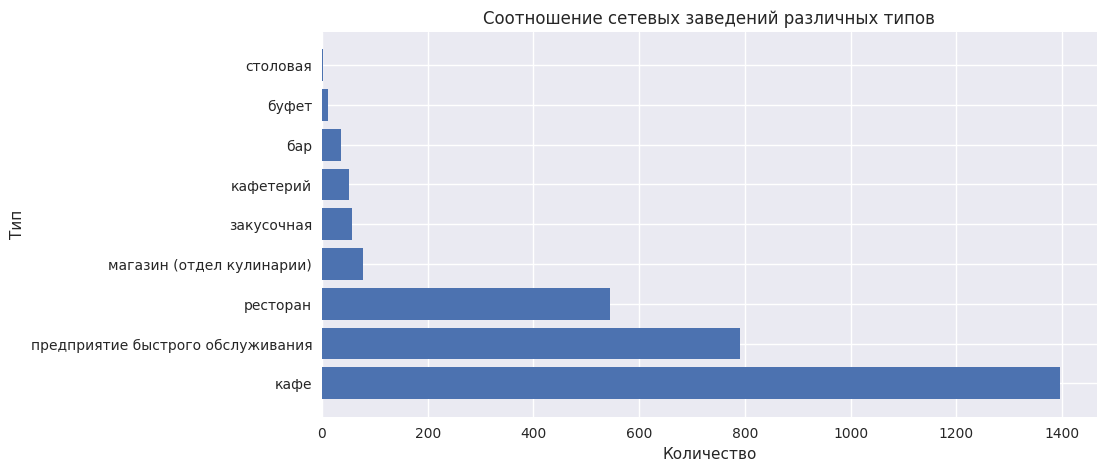

In [15]:
chain_types = chain.groupby(
    by='object_type')\
    .agg({'id':'count'})\
    .reset_index()\
    .sort_values(by='id', ascending=False)

figure(figsize=(10, 5))
with plt.style.context('seaborn'):
    plt.barh(chain_types['object_type'], chain_types['id'])
    
plt.title('Соотношение сетевых заведений различных типов')
plt.xlabel('Количество')
plt.ylabel('Тип')
plt.show();

Среди сетевых заведений самый популярный тип - кафе, а в плане соотношения с несетевыми заведениями - предприятие быстрого питания.

In [16]:
chain['number'].value_counts().head(5)

0     268
20    161
40    144
10    131
30    122
Name: number, dtype: int64

Количество посадочных мест в среднем варьируется от 20 до 50 - из этого можно сделать вывод, что популярно большое количество заведений не очень больших размеров

In [17]:
chain['number'].median()

40.0

In [18]:
chain_median_name = chain.groupby(
    by='object_name')\
    .agg({'id':'count', 'number':'median'})\
    .sort_values(by='id', ascending=False)\
    .head(10)
chain_median_name

,id,number
object_name,,
KFC,155,45.0
Шоколадница,141,50.0
Макдоналдс,122,75.0
Бургер Кинг,122,41.5
Домино'с Пицца,86,16.0
Теремок,84,21.0
Крошка Картошка,82,15.0
Милти,65,0.0
Суши Wok,61,6.0


In [19]:
chain_median_name.describe()

,id,number
count,10.000000,10.000000
mean,96.800000,28.950000
std,35.891194,23.212126
min,50.000000,0.000000
25%,69.250000,15.250000
50%,85.000000,20.500000
75%,122.000000,44.125000
max,155.000000,75.000000


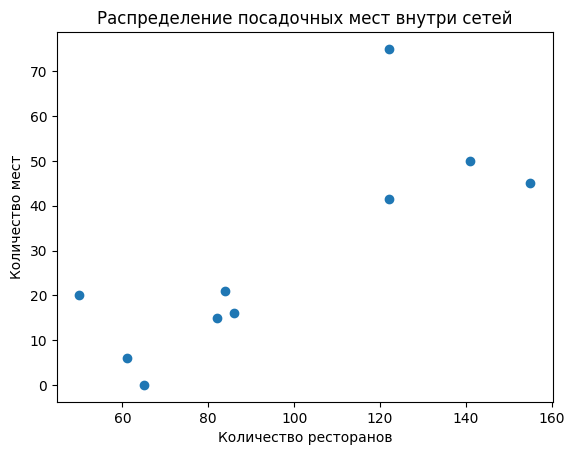

In [20]:
plt.scatter(x='id', y='number', data=chain_median_name)
plt.title('Распределение посадочных мест внутри сетей')
plt.xlabel('Количество ресторанов')
plt.ylabel('Количество мест')
plt.show();

# Вывод

Из 15366 заведений 2968 являются сетевыми, а остальные 12398 - не сетевыми, то есть, сетевые заведения составляют 19,3% от общего числа заведений общепита.

Среди сетевых заведений самый популярный тип - кафе, а в плане соотношения с несетевыми заведениями - предприятие быстрого питания.

Среднее количество посадочных мест в сетевых заведениях - 20, конкретно в кафе - 30.

Тенденция, которую можно увидеть на графике - чем больше ресторанов в сети, тем больше посадочных мест, соответственно, исходя из этого графика сложно однозначно сказать, какие места более распространены; если обратиться к таблице с общим анализом, то можно увидеть, что количество посадочных мест в среднем варьируется от 20 до 50 - из этого можно сделать вывод, что популярно большое количество заведений не очень больших размеров  

В топе-5 самых популярных сетей три - фастфуд (KFC, Макдоналдс и Бургер Кинг), одна пиццерия (Домино’с Пицца) и одно кафе (Шоколадница).

# Среднее количество посадочных мест

In [21]:
median_number = rest_data.groupby(
    by='object_type')\
    .agg({'number':'median'})\
    .sort_values(by='number', ascending=False)\
    .reset_index()
median_number

,object_type,number
0,столовая,103.0
1,ресторан,80.0
2,бар,35.0
3,буфет,32.0
4,кафе,30.0
5,кафетерий,6.0
6,предприятие быстрого обслуживания,5.0
7,закусочная,0.0
8,магазин (отдел кулинарии),0.0


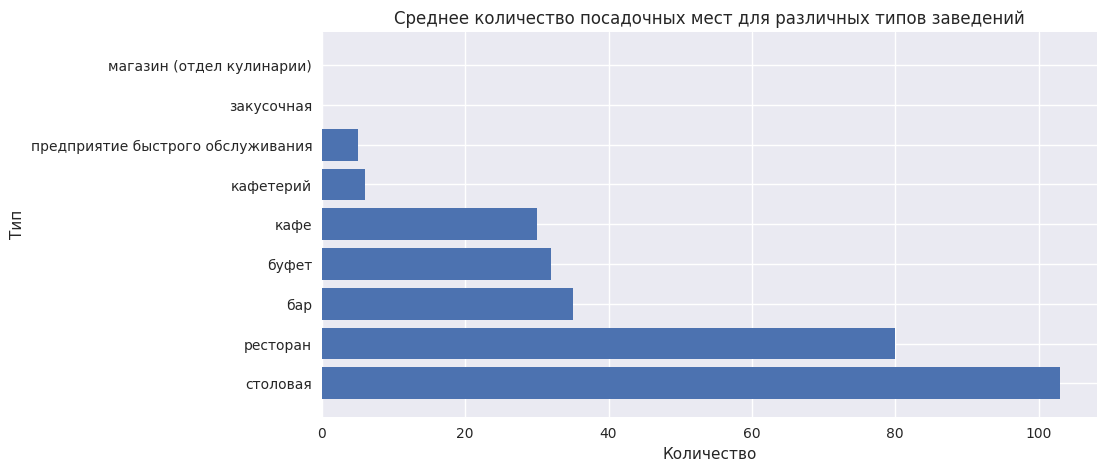

In [22]:
figure(figsize=(10,5))
with plt.style.context('seaborn'):
    plt.barh(median_number['object_type'], median_number['number'])
    
plt.title('Среднее количество посадочных мест для различных типов заведений')
plt.xlabel('Количество')
plt.ylabel('Тип')
plt.show();

# Вывод

Наибольшее число посадочных мест в среднем в столовых и ресторанах, в кафе в реднем около 30 посадочных мест

# Анализ расположения

Выделим улицы из общего адреса:

In [23]:
streets = ["аллея", "бульвар", "магистраль", "переулок", "площадь", "проезд", "проспект", "проулок", "разъезд", "спуск", "тракт", "тупик", "улица", "шоссе", "набережная"]

def street_finder(address):
    for address_part in address.split(','):
        for s_type in streets:
            if s_type in address_part:
                return address_part.strip()
            
rest_data['streetname'] = rest_data['address'].apply(street_finder)

rest_data

,id,object_name,chain,object_type,address,number,streetname
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,Абрамцевская улица
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,Абрамцевская улица
...,...,...,...,...,...,...,...
15361,208537,Шоколадница,да,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50,3-й Крутицкий переулок
15362,209264,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",10,улица Земляной Вал
15363,209186,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",20,улица Земляной Вал
15364,221900,Шоколадница,да,кафе,"город Москва, поселение Московский, Киевское ш...",36,Киевское шоссе


Подгрузим данные об улицах и округах Москвы:

In [24]:
spreadsheet_id = '1pNPFtjXOnzCkYW3ph2RRj5psw1v-Um_8DH1YO-SO0_k'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
mos_streets = pd.read_csv(BytesIO(r.content))
mos_streets

,streetname,areaid,okrug,area
0,Выставочный переулок,17,ЦАО,Пресненский район
1,улица Гашека,17,ЦАО,Пресненский район
2,Большая Никитская улица,17,ЦАО,Пресненский район
3,Глубокий переулок,17,ЦАО,Пресненский район
4,Большой Гнездниковский переулок,17,ЦАО,Пресненский район
...,...,...,...,...
4393,Вознесенский проезд,17,ЦАО,Пресненский район
4394,Волков переулок,17,ЦАО,Пресненский район
4395,Поварская улица,17,ЦАО,Пресненский район
4396,Кудринская площадь,17,ЦАО,Пресненский район


Объединим эти датасеты, чтобы найти районы для улиц:

In [25]:
rest_data = rest_data.merge(mos_streets, on='streetname')
rest_data

,id,object_name,chain,object_type,address,number,streetname,areaid,okrug,area
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова,86,СВАО,Ярославский Район
1,193477,Grill-House,нет,закусочная,"город Москва, улица Егора Абакумова, дом 14А",0,улица Егора Абакумова,86,СВАО,Ярославский Район
2,196756,Пекарня,нет,кафетерий,"город Москва, улица Егора Абакумова, дом 14А",12,улица Егора Абакумова,86,СВАО,Ярославский Район
3,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина,18,ЦАО,Таганский район
4,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина,117,ЮВАО,Нижегородский район
...,...,...,...,...,...,...,...,...,...,...
29365,206426,Чайхана «Мантыбар»,нет,ресторан,"город Москва, улица Кожевнический Вражек, дом 3А",30,улица Кожевнический Вражек,98,ЮАО,Даниловский район
29366,214324,Кадаши ( закрытый),нет,ресторан,"город Москва, 2-й Кадашёвский переулок, дом 16...",15,2-й Кадашёвский переулок,21,ЦАО,Район Якиманка
29367,223171,Кондитерская «Пряник.Рогалик»,нет,кафе,"город Москва, город Троицк, Пионерская улица, ...",20,Пионерская улица,43,ЗАО,Район Внуково
29368,213851,Ресторан «АТМОСФЕРА»,нет,ресторан,"город Москва, улица Василисы Кожиной, дом 1, к...",49,улица Василисы Кожиной,48,ЗАО,Район Филевский Парк


Выделим топ-10 улиц с наибольшим количеством ресторанов и посмотрим, где они находятся:

In [26]:
top_10_streets = rest_data.groupby(
    by=['streetname'])\
    .agg({'id':'count'})\
    .sort_values(by='id', ascending=False)\
    .reset_index()
top_10_streets = top_10_streets.head(10)
top_10_streets

,streetname,id
0,проспект Мира,1428
1,Варшавское шоссе,1320
2,Ленинский проспект,1184
3,Профсоюзная улица,1098
4,Дмитровское шоссе,700
5,Ленинградский проспект,692
6,проспект Вернадского,660
7,Ленинградское шоссе,600
8,Каширское шоссе,448
9,Волгоградский проспект,441


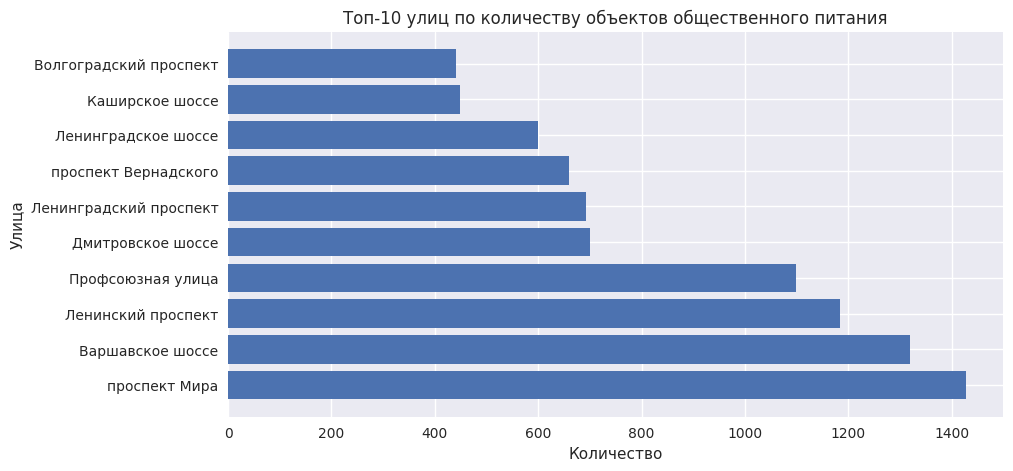

In [27]:
figure(figsize=(10,5))
with plt.style.context('seaborn'):
    plt.barh(top_10_streets['streetname'], top_10_streets['id'])
    
plt.title('Топ-10 улиц по количеству объектов общественного питания')
plt.xlabel('Количество')
plt.ylabel('Улица')
plt.show();

In [28]:
top_streetnames = top_10_streets['streetname']
top_area = rest_data.query('streetname in @top_streetnames')
top_area['area'].value_counts()

Обручевский район                  331
Район Теплый Стан                  331
Донской район                      313
Ломоносовский район                280
Район Проспект Вернадского         280
Район Тропарево-Никулино           280
Район Гагаринский                  280
Район Нагатино-Садовники           277
Район Сокол                        273
Ярославский Район                  204
Мещанский район                    204
Район Свиблово                     204
Алексеевский район                 204
Район Ростокино                    204
Останкинский район                 204
Район Марьина роща                 204
Район Коньково                     183
Академический район                183
Район Черемушки                    183
Район Ясенево                      183
Хорошевский район                  173
Район Беговой                      173
Район Аэропорт                     173
Район Чертаново Северное           165
Район Чертаново Центральное        165
Район Чертаново Южное    

Наибольшее число заведений из числа тех, которые находятся на самых популярных улицах, располагаются в районах Теплый Стан, Обручевский и Донской.

Найдем улицы с одним заведением и также посмотрим их расположение:

In [29]:
one_rest_street = rest_data.groupby(
    by='streetname')\
    .agg({'id':'count'})\
    .reset_index()\
    .sort_values(by='id', ascending=False)

one_rest_street = one_rest_street.query('id == 1')
one_rest_street

,streetname,id
1622,улица Медведева,1
140,2-я улица Бухвостова,1
872,Олонецкий проезд,1
154,3-й Стрелецкий проезд,1
1541,улица Клочкова,1
...,...,...
1432,улица Брусилова,1
396,Винницкая улица,1
402,Волоцкой переулок,1
1429,улица Бориса Жигулёнкова,1


In [30]:
one = one_rest_street['streetname']
one_area = rest_data.query('streetname in @one')
one_area['area'].value_counts()

Таганский район              25
Басманный район              23
Район Хамовники              22
Тверской район               19
Район Марьина роща           16
                             ..
Район Восточное Измайлово     1
Район Чертаново Южное         1
Район Метрогородок            1
Район Ивановское              1
Район Филевский Парк          1
Name: area, Length: 96, dtype: int64

# Вывод

Наибольшее число улиц с максимальным количеством объектов общепита располагается в районах Теплый Стан, Обручевский и Донской; наибольшее число улиц с одним заведением располагается в Таганском, Басманном, Хамовниках, Тверском и Марьионй роще

# Общий вывод

- наиболее популярный тип заведений в Москве - кафе (39,7%)
- большинство заведений (80,7%) не принадлежат определенной сети
- среди сетевых объектов также самыми распространенными являются кафе (47% от всех сетевых заведений)
- по отношению к независимым заведениям доля предприятий быстрого обслуживания принадлежит сетям
- большее распространение имеют заведения с количеством посадочных мест от 10 до 50 (не считая отделов кулинарии и закусочных, где посадочные места не предусмотрены)
- в среднем, наибольшее количество посадочных мест в столовых и ресторанах (103 и 80 соответственно)
- в кафе среднее количество посадочных мест равно 30
- наибольшее число улиц с максимальным количеством объектов общепита располагается в районах Теплый Стан, Обручевский и Донской
- наибольшее число улиц с одним заведением также располагается в Таганском, Басманном, Хамовниках, Тверском и Марьионй роще



Итак, посмотрев на имеющиеся у нас данные, можно сказать, что кафе, судя по той доле рынка, которую они занимают, всегда пользуются большой популярностью у москвичей, оптимальное количество посадочных мест для будущего кафе - около тридцати, а место расположения первого ресторана желательно выбрать в центре - так заведение сможет быстро набрать популярность в виду большой проходимости и обилия туристов, в контексте развития сети можно сказать следующее - в удалении от центра, а именно, в районах Теплый Стан, Обручевский и Донской, наблюдается высокая концентрация объектов общепита, это значит, что в этих районах на них гарантированно есть спрос, однако, конкуренция также будет выше, в центре же больше улиц с одним заведением, однако, выше стоимость аренды и под вопросом потенциальный успех заведения
перспективы развития сети нашего кафе также выглядят довольно приятно - доля рынка сетевых заведений около девятнадцати процентов, и этот рынок в основном занят такими сетями как KFC, Макдоналдс, Бургер Кинг (первое, третье и четвертое место по популярности) - иными словами, ресторанами фастфуда, однако, посмотрев на успех Шоколадницы (второе место по популярности), можно сказать, что формат сетевого кафе будет вполне востребован, и конкуренции в этой нише будет значительно меньше, чем в нише тех же ресторанов быстрого питания

Ссылка на презентацию: https://docs.google.com/presentation/d/1Wk_UllU8NbShCNir3elaWamP6TUpRWfWDzY_knBdhcA/edit?usp=sharing